In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as smb
import statsmodels.api as smo
import statsmodels.formula.api as smf
from scipy import stats

df = pd.read_csv(r'data25_01.csv')

In [47]:
df_training = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_training.index)
coef = df_test.corr()
print(coef)

          X1        X2         Y
X1  1.000000 -0.073827  0.893737
X2 -0.073827  1.000000  0.326787
Y   0.893737  0.326787  1.000000


In [18]:
sns.heatmap(df_training.corr(),linewidths=1.5, linecolor="black")

c:\users\валера\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2', ylabel='Y'>

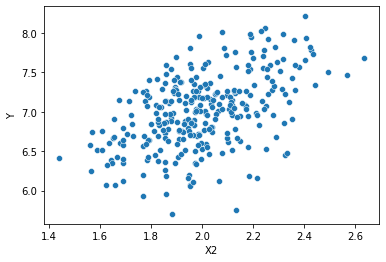

In [53]:
sns.scatterplot(df['X2'], df['Y'])

In [54]:
modar = smf.ols(formula = 'Y ~ X1 + np.power(X2,2)',data = df_training)
res = modar.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2291.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          9.31e-156
Time:                        00:54:34   Log-Likelihood:                 199.53
No. Observations:                 240   AIC:                            -393.1
Df Residuals:                     237   BIC:                            -382.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9922      0.091     10.912      0.000       0.813       1.171
X1                  0.9967      0.018     56.706      0.000       0.962       1.031
np.power(X2, 2)     0.2527      0.008     30.733      0.000       0.236       0.269
==============================================================================
Omnibus:                        0.591   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.686
Skew:                          -0.111   Prob(JB):                        0.710
Kurtosis:                       2.862   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

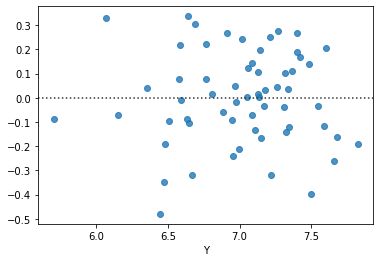

Root mean square: 0.03794974644934917


In [26]:
y_pred = res.predict(exog = df_test["X1"])
sns.residplot(x = df_test["Y"], y = y_pred)
plt.show()
n = len(df_test)
print("Root mean square:",sum(1/n*(df_test["Y"]-y_pred)**2))

In [55]:
modar2 = smf.ols(formula = 'Y ~ X1 + X2',data = df_training)
res2 = modar2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2413.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.72e-158
Time:                        00:54:39   Log-Likelihood:                 205.44
No. Observations:                 240   AIC:                            -404.9
Df Residuals:                     237   BIC:                            -394.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0491      0.102     -0.480      0.632      -0.251       0.152
X1             0.9986      0.017     58.258      0.000       0.965       1.032
X2             1.0266      0.032     31.689      0.000       0.963       1.090
==============================================================================
Omnibus:                        0.799   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.886
Skew:                          -0.059   Prob(JB):                        0.642
Kurtosis:                       2.726   Cond. No.                         86.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
res2.params

Intercept   -0.049094
X1           0.998606
X2           1.026611
dtype: float64

The equation is $y = 1.026611*X2 + 0.998606*X1 - 0.049094$

Mean square error: 0.004535410356919462


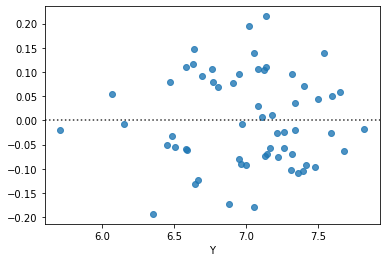

In [57]:
y_pred = res2.predict(exog = df_test[["X1","X2"]])
N = len(df_tst)
print("Mean square error:",sum(1/N*(df_test["Y"]-y_pred)**2))
sns.residplot(x = df_test["Y"], y = y_pred)
plt.show()
